<a href="https://colab.research.google.com/github/blackdragon18/codificacion/blob/main/pathfinding2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Path finding using A*##

The problem definition: https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2

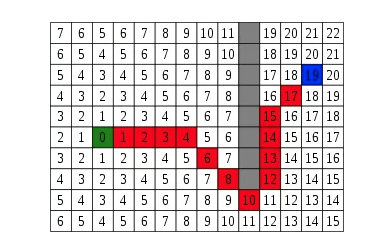

You are navigating a matrix and there are one starting points S and one end point T. Some cells of the matrix are walls, represented by 1, the others are 0s which you can travel through.

You can travel in all the 8 directions, and the cost for each step is 1. Find the path from S to T that has the minimum cost.

In [9]:
import heapq, collections, re, sys, time, os, random

# Data structure for supporting uniform cost search.
class PriorityQueue:
    def  __init__(self):
        self.DONE = -100000
        self.heap = []
        self.priorities = {}  # Map from state to priority

    # Insert |state| into the heap with priority |newPriority| if
    # |state| isn't in the heap or |newPriority| is smaller than the existing
    # priority.
    # Return whether the priority queue was updated.
    def update(self, node, newCost, newHistory):
        oldCost = self.priorities.get(node, None)
        if oldCost == None or newCost < oldCost:
            self.priorities[node] = newCost
            heapq.heappush(self.heap, (newCost, node, newHistory))
            return True
        return False

    # Returns (state with minimum priority, priority)
    # or (None, None) if the priority queue is empty.
    def removeMin(self):
        while len(self.heap) > 0:
            priority, state, history = heapq.heappop(self.heap)
            if self.priorities[state] == self.DONE: continue  # Outdated priority, skip
            self.priorities[state] = self.DONE
            return (state, priority, history)
        return (None, None, None) # Nothing left...


In [10]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

    def __eq__(self, other):
        return self.position == other.position

    def __hash__(self):
        return self.position[0] * 1000000 + self.position[1]

    def __le__(self, other):
        self_hash = self.position[0] * 1000000 + self.position[1]
        other_hash = other.position[0] * 1000000 + other.position[1]
        return self_hash <= other_hash

    def __lt__(self, other):
        self_hash = self.position[0] * 1000000 + self.position[1]
        other_hash = other.position[0] * 1000000 + other.position[1]
        return self_hash < other_hash

In [11]:
class PathFinding(object):
    def __init__(self, maze, start_position, end_position):
        self.maze = maze
        self.start_node = Node(parent=None, position=start_position)
        self.end_node = Node(parent=None, position=end_position)
    def startState(self):
        return self.start_node
    def succ(self, node):
        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (node.position[0] + new_position[0], node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(self.maze[len(self.maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if self.maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(parent=node, position=node_position)

            # Append
            children.append(new_node)
        return children
    def isEnd(self, end_node):
        return self.end_node == end_node
    def heuristic(self, node):
        import math
        return abs(node.position[0] - self.end_node.position[0]) + abs(node.position[1] - self.end_node.position[1])
        #return ((node.position[0] - self.end_node.position[0]) ** 2) + ((node.position[1] - self.end_node.position[1]) ** 2)

In [3]:
class PathFinding:
    def __init__(self, maze, start_position, end_positions):
        self.maze = maze
        self.start_node = Node(None, start_position)
        self.end_nodes = [Node(None, pos) for pos in end_positions]

    def isEnd(self, node):
        return node.position in [end.position for end in self.end_nodes]

    def heuristic(self, node):
        return min(abs(node.position[0] - end.position[0]) + abs(node.position[1] - end.position[1]) for end in self.end_nodes)


In [12]:
def astar(problem):

    trajectory = []

    frontier = PriorityQueue()
    start_node = problem.startState()
    frontier.update(start_node, problem.heuristic(start_node), [])
    explored = set([])

    while True:
      # Move the minimum cost node from frontier to explored
      current_node, pastCost, history = frontier.removeMin()
      explored.add(current_node)
      if problem.isEnd(current_node):
            # TODO: return the past cost and history
            return (pastCost, history)
      current_node_heuristic = problem.heuristic(current_node)
      for child_node in problem.succ(current_node):
        if child_node in explored:
          continue
        child_heusitic = problem.heuristic(child_node)
        frontier.update(child_node, pastCost + 1 + child_heusitic - current_node_heuristic, history + [child_node])
    print(stepcount)

In [4]:
def astar(problem):
    frontier = PriorityQueue()
    start_node = problem.startState()
    frontier.update(start_node, problem.heuristic(start_node), [])
    explored = set()

    while True:
        current_node, pastCost, history = frontier.removeMin()
        if current_node is None:
            return None
        explored.add(current_node)
        if problem.isEnd(current_node):
            return pastCost, history
        current_node_heuristic = problem.heuristic(current_node)
        for child_node in problem.succ(current_node):
            if child_node in explored:
                continue
            child_heuristic = problem.heuristic(child_node)
            frontier.update(child_node, pastCost + 1 + child_heuristic - current_node_heuristic, history + [child_node])


In [13]:
def printSolution(solution):
    totalCost, history = solution
    print('totalCost: {}'.format(len(history)))
    for node in history:
        print(node.position)

In [14]:
# maze = [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
#         [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
#         [0, 0, 0, 1, 1, 1, 1, 0, 1, 0],
#         [0, 0, 0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# website to generate maze: https://rosettacode.org/wiki/Maze_generation

maze = [[1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1],
[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
[1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1],
[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1],
[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1],
[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1],
[1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1],
[1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],
[1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1],
[1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1],
[1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1],
[1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1],
[1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,1,1,1,1,1,1,0,0,1,0,0,1],
[1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1],
[1,0,0,1,0,0,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1],
[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1],
[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]]


start = (0, 1)
end = (1, 48)
ends = [(1, 48), (0, 39), (4, 0)]

# TODO: replace the code above so we can find shortest path to exit the maze using PathFinding(maze, start, ends)
problem = PathFinding(maze, start, end)
solution = astar(problem)
printSolution(solution)

totalCost: 112
(1, 2)
(1, 3)
(1, 4)
(1, 5)
(1, 6)
(1, 7)
(1, 8)
(1, 9)
(1, 10)
(1, 11)
(1, 12)
(1, 13)
(1, 14)
(1, 15)
(1, 16)
(1, 17)
(1, 18)
(1, 19)
(1, 20)
(1, 21)
(1, 22)
(1, 23)
(1, 24)
(1, 25)
(1, 26)
(1, 27)
(1, 28)
(1, 29)
(1, 30)
(2, 31)
(3, 30)
(3, 29)
(4, 28)
(5, 27)
(6, 26)
(7, 26)
(8, 26)
(9, 26)
(10, 25)
(11, 24)
(12, 23)
(13, 24)
(13, 25)
(14, 26)
(15, 27)
(15, 28)
(15, 29)
(15, 30)
(15, 31)
(15, 32)
(15, 33)
(15, 34)
(15, 35)
(15, 36)
(15, 37)
(15, 38)
(15, 39)
(15, 40)
(15, 41)
(15, 42)
(14, 43)
(13, 44)
(12, 44)
(11, 45)
(10, 46)
(9, 45)
(9, 44)
(9, 43)
(9, 42)
(9, 41)
(10, 40)
(11, 39)
(11, 38)
(11, 37)
(11, 36)
(11, 35)
(12, 34)
(13, 33)
(12, 32)
(11, 32)
(10, 32)
(9, 33)
(8, 34)
(7, 35)
(7, 36)
(6, 37)
(5, 38)
(4, 37)
(3, 36)
(2, 35)
(1, 36)
(1, 37)
(1, 38)
(1, 39)
(2, 40)
(3, 41)
(4, 41)
(5, 41)
(6, 41)
(7, 42)
(7, 43)
(7, 44)
(7, 45)
(6, 46)
(5, 47)
(4, 46)
(3, 45)
(2, 44)
(1, 45)
(1, 46)
(1, 47)
(1, 48)


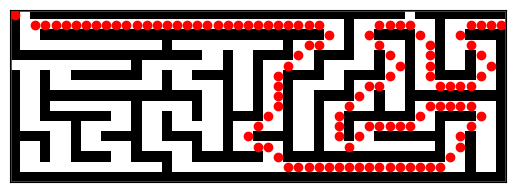

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

totalCost, history = solution
trajectory = [(0, 0)]
for node in history:
    trajectory.append(node.position)

fig, ax = plt.subplots()
maze_np = np.array(maze)

def draw_maze():
    ax.clear()
    ax.imshow(maze_np, cmap="gray_r")

    height, width = maze_np.shape

    ax.set_xticks([])
    ax.set_yticks([])

    outer_border = patches.Rectangle((-0.5, -0.5), width, height, linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(outer_border)

def animate_trajectory():
    draw_maze()
    for i, (x, y) in enumerate(trajectory):
      ax.scatter(y, x, c="red", marker="o")
    plt.show()

animate_trajectory()